In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import os
import pandas as pd
import requests
import zipfile
import io

if not os.path.exists('AirQualityUCI.csv'):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall()

# Load dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [25]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.columns = ['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 
              'PT08_S2_NMHC', 'NOx_GT', 'PT08_S3_NOx', 'NO2_GT', 
              'PT08_S4_NO2', 'PT08_S5_O3', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity']
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temperature,Relative_Humidity,Absolute_Humidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [26]:
import warnings
warnings.filterwarnings('ignore')

print("Null values before cleaning:")
print(df.isnull().sum())
print(f"\nShape before: {df.shape}")

df = df.replace(-200.0, np.nan)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {len(numerical_cols)} columns")
print(f"Categorical columns: {categorical_cols}")

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled {col} with median: {median_value:.2f}")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} with mode: {mode_value}")

df = df.reset_index(drop=True)

print(f"\nShape after cleaning: {df.shape}")
print("\nNull values after cleaning:")
print(df.isnull().sum())
print("\nData info:")
print(df.info())

Null values before cleaning:
Date                 114
Time                 114
CO_GT                114
PT08_S1_CO           114
NMHC_GT              114
C6H6_GT              114
PT08_S2_NMHC         114
NOx_GT               114
PT08_S3_NOx          114
NO2_GT               114
PT08_S4_NO2          114
PT08_S5_O3           114
Temperature          114
Relative_Humidity    114
Absolute_Humidity    114
dtype: int64

Shape before: (9471, 15)

Numerical columns: 13 columns
Categorical columns: ['Date', 'Time']
Filled CO_GT with median: 1.80
Filled PT08_S1_CO with median: 1063.00
Filled NMHC_GT with median: 150.00
Filled C6H6_GT with median: 8.20
Filled PT08_S2_NMHC with median: 909.00
Filled NOx_GT with median: 180.00
Filled PT08_S3_NOx with median: 806.00
Filled NO2_GT with median: 109.00
Filled PT08_S4_NO2 with median: 1463.00
Filled PT08_S5_O3 with median: 963.00
Filled Temperature with median: 17.80
Filled Relative_Humidity with median: 49.60
Filled Absolute_Humidity with median: 1.00


In [27]:
# Removing duplicate rows
print(f"Before removing duplicates: {df.shape[0]} rows")
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(f"After removing duplicates: {df.shape[0]} rows")

df.head()

Before removing duplicates: 9471 rows
After removing duplicates: 9358 rows


,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temperature,Relative_Humidity,Absolute_Humidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [28]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract day, month, year, and day of week
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek # 0=Monday, 6=Sunday

print("Extracted columns:")
print(f"Day range: {df['Day'].min()} to {df['Day'].max()}")
print(f"Month range: {df['Month'].min()} to {df['Month'].max()}")
print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")
print(f"DayOfWeek range: {df['DayOfWeek'].min()} to {df['DayOfWeek'].max()}")

# Remove the Date column
df = df.drop('Date', axis=1)
df.head()

Extracted columns:
Day range: 1 to 31
Month range: 1 to 12
Year range: 2004 to 2005
DayOfWeek range: 0 to 6


,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temperature,Relative_Humidity,Absolute_Humidity,Day,Month,Year,DayOfWeek
0,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,2
1,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,2
2,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,2
3,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,2
4,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,2


In [29]:
# AQI Formula: AQI = [(I_high - I_low) / (C_high - C_low)] * (C - C_low) + I_low
def calculate_sub_aqi(C, breakpoints):
    """
    Calculate AQI sub-index for a pollutant using linear interpolation
    C: Measured concentration
    breakpoints: List of [C_low, C_high, I_low, I_high]
    """
    for bp in breakpoints:
        C_low, C_high, I_low, I_high = bp
        if C_low <= C <= C_high:
            AQI = ((I_high - I_low) / (C_high - C_low)) * (C - C_low) + I_low
            return round(AQI)
    # If concentration exceeds all breakpoints
    return 500

# Standard AQI Breakpoints for each pollutant
# CO (Carbon Monoxide) - in mg/m³
co_breakpoints = [
    [0.0, 4.4, 0, 50],
    [4.5, 9.4, 51, 100],
    [9.5, 12.4, 101, 150],
    [12.5, 15.4, 151, 200],
    [15.5, 30.4, 201, 300],
    [30.5, 50.4, 301, 500]
]

# NMHC (Non-Methane Hydrocarbons) - in µg/m³
nmhc_breakpoints = [
    [0, 200, 0, 50],
    [201, 500, 51, 100],
    [501, 1000, 101, 150],
    [1001, 1500, 151, 200],
    [1501, 2000, 201, 300],
    [2001, 3000, 301, 500]
]

# C6H6 (Benzene) - in µg/m³
c6h6_breakpoints = [
    [0, 5, 0, 50],
    [5.1, 10, 51, 100],
    [10.1, 15, 101, 150],
    [15.1, 20, 151, 200],
    [20.1, 30, 201, 300],
    [30.1, 63.7, 301, 500]
]

# NOx (Nitrogen Oxides) - in µg/m³
nox_breakpoints = [
    [0, 100, 0, 50],
    [101, 200, 51, 100],
    [201, 700, 101, 150],
    [701, 1200, 151, 200],
    [1201, 2000, 201, 300],
    [2001, 3000, 301, 500]
]

# NO2 (Nitrogen Dioxide) - in µg/m³
no2_breakpoints = [
    [0, 53, 0, 50],
    [54, 100, 51, 100],
    [101, 360, 101, 150],
    [361, 649, 151, 200],
    [650, 1249, 201, 300],
    [1250, 2049, 301, 500]
]

# Calculate sub-indices for each pollutant
print("Calculating sub-indices for each pollutant...")
df['CO_AQI'] = df['CO_GT'].apply(lambda x: calculate_sub_aqi(x, co_breakpoints))
df['NMHC_AQI'] = df['NMHC_GT'].apply(lambda x: calculate_sub_aqi(x, nmhc_breakpoints))
df['C6H6_AQI'] = df['C6H6_GT'].apply(lambda x: calculate_sub_aqi(x, c6h6_breakpoints))
df['NOx_AQI'] = df['NOx_GT'].apply(lambda x: calculate_sub_aqi(x, nox_breakpoints))
df['NO2_AQI'] = df['NO2_GT'].apply(lambda x: calculate_sub_aqi(x, no2_breakpoints))

# Overall AQI is the maximum of all sub-indices
df['AQI'] = df[['CO_AQI', 'NMHC_AQI', 'C6H6_AQI', 'NOx_AQI', 'NO2_AQI']].max(axis=1)

# Add AQI category
def get_aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI_Category'] = df['AQI'].apply(get_aqi_category)

# Remove individual AQI columns, keeping only main AQI and AQI_Category
df = df.drop(['CO_AQI', 'NMHC_AQI', 'C6H6_AQI', 'NOx_AQI', 'NO2_AQI'], axis=1)

print(f"\nAQI Range: {df['AQI'].min()} to {df['AQI'].max()}")

print("\n\nAQI Category Distribution:")
print(df['AQI_Category'].value_counts())

df.head()

Calculating sub-indices for each pollutant...

AQI Range: 18 to 500


AQI Category Distribution:
AQI_Category
Unhealthy for Sensitive Groups    4637
Moderate                          2142
Unhealthy                         1037
Very Unhealthy                     766
Good                               593
Hazardous                          183
Name: count, dtype: int64


,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temperature,Relative_Humidity,Absolute_Humidity,Day,Month,Year,DayOfWeek,AQI,AQI_Category
0,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,2,119,Unhealthy for Sensitive Groups
1,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,2,94,Moderate
2,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,2,103,Unhealthy for Sensitive Groups
3,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,2,105,Unhealthy for Sensitive Groups
4,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,2,104,Unhealthy for Sensitive Groups


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

# Setting Random Seeds 
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
print(f"Random seed set to {SEED}")

# 1. Data Preparation
# Preprocessing the Time column
if 'Time' in df.columns:
    def parse_time(x):
        try:
            return int(str(x).split('.')[0])
        except:
            return 0
            
    df['Hour'] = df['Time'].apply(parse_time)
    df = df.drop('Time', axis=1)

# Selecting only numerical columns for the model this excludes 'AQI_Category'. 
data_for_model = df.select_dtypes(include=[np.number])

# Ensuring AQI is the last column for easier processing
if 'AQI' in data_for_model.columns:
    cols = [c for c in data_for_model.columns if c != 'AQI'] + ['AQI']
    data_for_model = data_for_model[cols]

print("Columns used for training:", data_for_model.columns.tolist())

# Target is AQI
values = data_for_model.values

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    # Target column index (AQI is the last column)
    target_idx = -1
    
    for i in range(len(data) - seq_length):
        # Input: Sequence of 'seq_length' rows, all features
        X.append(data[i:(i + seq_length), :])
        # Output: The target value at the next time step
        y.append(data[i + seq_length, target_idx])
    return np.array(X), np.array(y)

SEQ_LENGTH = 72 
X, y = create_sequences(scaled_data, SEQ_LENGTH)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Random seed set to 42
Columns used for training: ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'NOx_GT', 'PT08_S3_NOx', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'Temperature', 'Relative_Humidity', 'Absolute_Humidity', 'Day', 'Month', 'Year', 'DayOfWeek', 'Hour', 'AQI']
X_train shape: (7428, 72, 19)
y_train shape: (7428,)


In [31]:
# 2. PSO Implementation & LSTM Builder
class Particle:
    def __init__(self, bounds):
        # Initialize position and velocity randomly within bounds
        self.position = np.array([np.random.uniform(b[0], b[1]) for b in bounds])
        self.velocity = np.array([np.random.uniform(-1, 1) for _ in bounds])
        self.best_position = self.position.copy()
        self.best_score = float('inf') # Minimizing loss
        self.score = float('inf')

def build_lstm_model(units, dropout_rate, learning_rate, input_shape):
    model = Sequential()
    # First LSTM layer with return_sequences=True to feed into the next LSTM layer
    model.add(LSTM(units=int(units), return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    # Second LSTM layer
    # We use half the units of the first layer for the second layer to create a funnel effect
    model.add(LSTM(units=int(max(units // 2, 10)), return_sequences=False))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1))
    
    # Adding clipnorm to prevent exploding gradients
    optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')
    return model

#Train model with params and returns validation loss
def fitness_function(params, X_train, y_train, X_val, y_val):
    # Unpack parameters
    units = int(params[0])
    dropout_rate = params[1]
    learning_rate = params[2]
    batch_size = int(params[3])
    
    # Build model
    model = build_lstm_model(units, dropout_rate, learning_rate, (X_train.shape[1], X_train.shape[2]))
    
    try:
        # Train model
        history = model.fit(
            X_train, y_train,
            epochs=10, 
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            verbose=0
        )
        # Return best validation loss
        val_loss = min(history.history['val_loss'])
        
        if np.isnan(val_loss):
            return float('inf')
            
        return val_loss
    except:
        return float('inf')

def pso_optimization(X_train, y_train, X_val, y_val, n_particles=5, n_iterations=5):
    # Hyperparameter bounds: [units, dropout, learning_rate, batch_size]
    # Expanded bounds to allow for more complex models
    bounds = [
        (64, 256),      # units
        (0.0, 0.3),     # dropout
        (0.0001, 0.005), # learning_rate
        (16, 128)       # batch_size
    ]
    
    particles = [Particle(bounds) for _ in range(n_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')
    
    w = 0.5  # Inertia weight
    c1 = 1.5 # Cognitive weight (personal best)
    c2 = 1.5 # Social weight (global best)
    
    print(f"Starting PSO with {n_particles} particles and {n_iterations} iterations...")
    
    for i in range(n_iterations):
        print(f"PSO Iteration {i+1}/{n_iterations}")
        
        for particle in particles:
            # Clip parameters to bounds before evaluation
            for j in range(len(bounds)):
                particle.position[j] = np.clip(particle.position[j], bounds[j][0], bounds[j][1])
            
            # Evaluate fitness
            score = fitness_function(particle.position, X_train, y_train, X_val, y_val)
            particle.score = score
            
            # Updating personal best
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()
            
            # Updating global best
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()
                print(f"  New Global Best Loss: {global_best_score:.6f}")
        
        # Updating particles velocity and position
        for particle in particles:
            r1, r2 = np.random.rand(), np.random.rand()
            
            particle.velocity = (w * particle.velocity + 
                                 c1 * r1 * (particle.best_position - particle.position) + 
                                 c2 * r2 * (global_best_position - particle.position))
            
            particle.position += particle.velocity
                
    return global_best_position, global_best_score

In [32]:
# Baseline Model (Before PSO)
# Training the model with default hyperparameters to establish a baseline for comparison
import warnings
warnings.filterwarnings('ignore')

# Default hyperparameters (commonly used values)
default_units = 64
default_dropout = 0.2
default_lr = 0.001
default_batch_size = 32

# Building baseline model using the same builder function
model_baseline = build_lstm_model(default_units, default_dropout, default_lr, (X_train.shape[1], X_train.shape[2]))

# Training baseline model
history_baseline = model_baseline.fit(
    X_train, y_train,
    epochs=20, 
    batch_size=default_batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred_baseline = model_baseline.predict(X_test)

# Inverse transform to get actual AQI values
# We need to construct a matrix with the same shape as the original scaler input
dummy_array_baseline = np.zeros((len(y_pred_baseline), data_for_model.shape[1]))
dummy_array_baseline[:, -1] = y_pred_baseline.flatten()
y_pred_baseline_inv = scaler.inverse_transform(dummy_array_baseline)[:, -1]

# Inverse transform y_test for comparison
dummy_array_test = np.zeros((len(y_test), data_for_model.shape[1]))
dummy_array_test[:, -1] = y_test.flatten()
y_test_inv_baseline = scaler.inverse_transform(dummy_array_test)[:, -1]

# Calculating Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_baseline = mean_squared_error(y_test_inv_baseline, y_pred_baseline_inv)
mae_baseline = mean_absolute_error(y_test_inv_baseline, y_pred_baseline_inv)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test_inv_baseline, y_pred_baseline_inv)

print(f"\nBaseline Performance Metrics (Before PSO):")
print(f"MAE: {mae_baseline:.2f}")
print(f"RMSE: {rmse_baseline:.2f}")
print(f"R² Score: {r2_baseline:.4f}")

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0182 - val_loss: 0.0071
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 7/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 8/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 9/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 10/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 11/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 12/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
# 3. Run Optimization
# Creating a validation split for the PSO process
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Run PSO
# Increased particles and iterations significantly to find the optimal solution
best_params, best_score = pso_optimization(X_train_sub, y_train_sub, X_val_sub, y_val_sub, n_particles=10, n_iterations=5)

print("\nBest Hyperparameters found:")
print(f"Units: {int(best_params[0])}")
print(f"Dropout: {best_params[1]:.4f}")
print(f"Learning Rate: {best_params[2]:.6f}")
print(f"Batch Size: {int(best_params[3])}")

Starting PSO with 10 particles and 5 iterations...
PSO Iteration 1/5
  New Global Best Loss: 0.004158
  New Global Best Loss: 0.003944
PSO Iteration 2/5
  New Global Best Loss: 0.003707
  New Global Best Loss: 0.003664
PSO Iteration 3/5
  New Global Best Loss: 0.003578
PSO Iteration 4/5
PSO Iteration 5/5
  New Global Best Loss: 0.003522

Best Hyperparameters found:
Units: 121
Dropout: 0.1118
Learning Rate: 0.005000
Batch Size: 64


Epoch 1/50
116/117 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0704
Epoch 1: val_loss improved from inf to 0.00527, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0696 - val_loss: 0.0053
Epoch 2/50
116/117 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067
Epoch 2: val_loss improved from 0.00527 to 0.00372, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 3/50
115/117 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 3: val_loss did not improve from 0.00372
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - val_loss: 0.0039
Epoch 4/50
115/117 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 4: val_loss improved from 0.00372 to 0.00288, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 5/50
114/117 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049
Epoch 5: val_loss improved from 0.00288 to 0.00287, saving mo

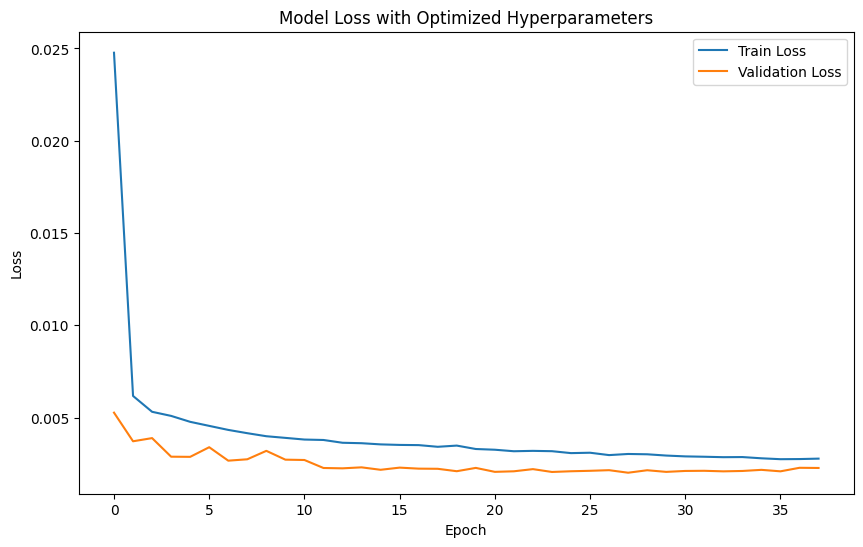

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


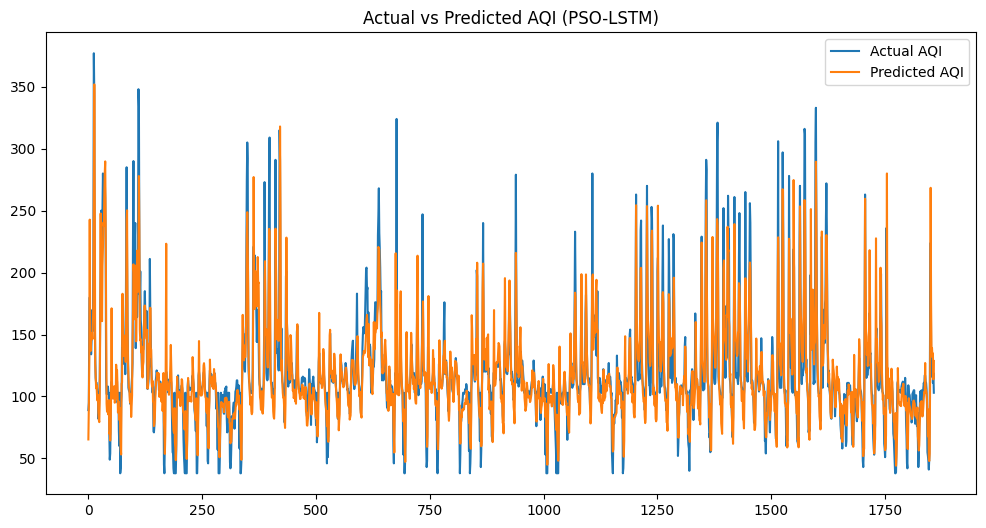


Final Performance Metrics:
MAE: 14.38
RMSE: 21.63


In [34]:
# 4. Training Final Model with Optimized Hyperparameters
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

best_units = int(best_params[0])
best_dropout = best_params[1]
best_lr = best_params[2]
best_batch_size = int(best_params[3])

final_model = build_lstm_model(best_units, best_dropout, best_lr, (X_train.shape[1], X_train.shape[2]))

# Callbacks for better training
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = final_model.fit(
    X_train, y_train,
    epochs=50, 
    batch_size=best_batch_size,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Plotting training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Optimized Hyperparameters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

final_model.load_weights('best_model.keras')

# Predictions
y_pred = final_model.predict(X_test)

# Inverse transform to get actual AQI values
dummy_array = np.zeros((len(y_pred), data_for_model.shape[1]))
# Replace the target column (last column) with predicted values
dummy_array[:, -1] = y_pred.flatten()
# Inverse transform
y_pred_inv = scaler.inverse_transform(dummy_array)[:, -1]

# Doing same for y_test to compare
dummy_array_test = np.zeros((len(y_test), data_for_model.shape[1]))
dummy_array_test[:, -1] = y_test.flatten()
y_test_inv = scaler.inverse_transform(dummy_array_test)[:, -1]

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual AQI')
plt.plot(y_pred_inv, label='Predicted AQI')
plt.title('Actual vs Predicted AQI (PSO-LSTM)')
plt.legend()
plt.show()

# Calculating Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"\nFinal Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.7639


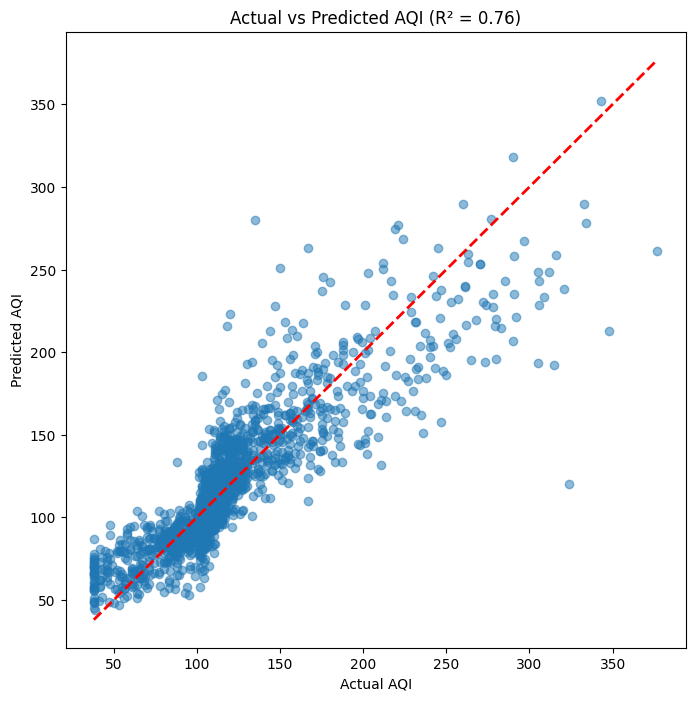

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R² Score: {r2:.4f}")

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.5)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI (R² = {r2:.2f})')
plt.show()